In [185]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame, Series
from google.colab import files

In [186]:
uploaded = files.upload()
df = pd.read_csv('Bitter.csv')

Saving Bitter.csv to Bitter (3).csv


<ipython-input-186-97eaf8a239b0>:2: DtypeWarning: Columns (0,4,5,6,8,9,179,180,182,260,261,263,264,266,269,277,278,296) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Bitter.csv')


In [187]:
df.head()

,Index,Name,PUBCHEM_COMPOUND_CID,ACTIVITY,ID,NonBitterID,Smiles,Frequency,Canonical_Smiles,Standardize_Actions_Taken,...,Kappa_2_AM,Kappa_3,Kappa_3_AM,PHI,SC_0,SC_1,SC_2,SC_3_C,SC_3_CH,SC_3_P
0,1,7765,"7,765",Non-Bitter,NaN,1_Fnb,O(C([H])([H])C([H])([H])[H])C([H])(C([H])([H])...,1.0,CCOC(C)OCC,NaN,...,5.06450,5.00000,4.92000,5.01386,8.0,7.0,7.0,1.0,0.0,6.0
1,2,177,177,Non-Bitter,2_Fnb,2_Fnb,O=C([H])C([H])([H])[H],1.0,CC=O,NaN,...,1.67000,0.00000,0.00000,1.48630,3.0,2.0,1.0,0.0,0.0,0.0
2,3,62876,"62,876",Non-Bitter,3_Fnb,3_Fnb,O(C([H])(C([H])([H])[H])OC([H])([H])C([H])([H]...,1.0,CCCCOC(C)OCCc1ccccc1,StandardizeStereo\nStandardizeStereo_ChiralFlag,...,8.31033,7.05817,6.36993,6.85916,16.0,16.0,18.0,2.0,0.0,19.0
3,4,83036,"83,036",Non-Bitter,4_Fnb,4_Fnb,O(C([H])(C([H])([H])[H])OC([H])([H])C([H])([H]...,1.0,CC(C)CCOC(C)OCCC(C)C,NaN,...,8.24664,11.00000,10.92000,8.19952,14.0,13.0,15.0,3.0,0.0,12.0
4,5,108504,"108,504",Non-Bitter,5_Fnb,5_Fnb,O(C([H])([H])C([H])([H])C([H])=C([H])C([H])([H...,1.0,CCOC(C)OCCC=CCC,StandardizeStereo\nStandardizeStereo_ChiralFlag,...,8.75380,9.00000,8.65999,8.50578,12.0,11.0,11.0,1.0,0.0,10.0


In [188]:
df.dtypes

,0
Index,object
Name,object
PUBCHEM_COMPOUND_CID,object
ACTIVITY,object
ID,object
...,...
SC_1,float64
SC_2,float64
SC_3_C,float64
SC_3_CH,float64


In [189]:
df_object=df.select_dtypes(include='object')

In [190]:
df_object

,Index,Name,PUBCHEM_COMPOUND_CID,ACTIVITY,ID,NonBitterID,Smiles,Canonical_Smiles,Standardize_Actions_Taken,Apol,...,E_ADJ_equ,E_ADJ_mag,E_DIST_equ,E_DIST_mag,V_ADJ_equ,V_ADJ_mag,V_DIST_equ,V_DIST_mag,Wiener,Zagreb
0,1,7765,"7,765",Non-Bitter,NaN,1_Fnb,O(C([H])([H])C([H])([H])[H])C([H])(C([H])([H])...,CCOC(C)OCC,NaN,"3,909.92",...,42.2929,53.303,115.927,255.094,48.5042,53.303,167.155,359.171,75,28
1,2,177,177,Non-Bitter,2_Fnb,2_Fnb,O=C([H])C([H])([H])[H],CC=O,NaN,"1,621.42",...,4,2,4,4,8.91968,8,13.7744,22.5,4,6
2,3,62876,"62,876",Non-Bitter,3_Fnb,3_Fnb,O(C([H])(C([H])([H])[H])OC([H])([H])C([H])([H]...,CCCCOC(C)OCCc1ccccc1,StandardizeStereo\nStandardizeStereo_ChiralFlag,"8,819.16",...,149.984,186.117,868.196,"1,953.86",139.152,160,891.406,"1,954.53",567,68
3,4,83036,"83,036",Non-Bitter,4_Fnb,4_Fnb,O(C([H])(C([H])([H])[H])OC([H])([H])C([H])([H]...,CC(C)CCOC(C)OCCC(C)C,NaN,"6,989.48",...,114.009,147.207,538.505,"1,185.94",110.675,122.211,652.831,"1,420.70",397,56
4,5,108504,"108,504",Non-Bitter,5_Fnb,5_Fnb,O(C([H])([H])C([H])([H])C([H])=C([H])C([H])([H...,CCOC(C)OCCC=CCC,StandardizeStereo\nStandardizeStereo_ChiralFlag,"6,277.60",...,82.7686,98.1075,375.982,788.964,88.8118,98.1075,468.196,976.917,265,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,NaN,NaN,"413,117",Bitter,NaN,NaN,NaN,NaN,NaN,"11,781.10",...,253.051,354.413,"1,400.39","3,732.69",193.859,226.477,"1,313.08","3,335.10",834,102
2071,NaN,NaN,"435,597",Bitter,NaN,NaN,NaN,NaN,NaN,"13,320.90",...,295.827,398.93,"1,918.65","5,107.06",232.192,268.078,"1,811.75","4,633.16","1,244",114
2072,NaN,NaN,"2,883,177",Bitter,NaN,NaN,NaN,NaN,NaN,"10,848.80",...,243.936,354.413,"1,139.41","3,349.80",181.343,212.877,"1,103.59","2,967.81",657,100
2073,NaN,NaN,"3,082,543",Bitter,NaN,NaN,NaN,NaN,NaN,"15,649.50",...,616.948,879.137,"5,249.55","14,713.10",404.411,474.842,"4,337.40","11,416","3,335",202


In [191]:
# המרה של המשתנה אקטיביטי ממשתנה קטגוריאלי למשתנה בינארי 0 או 1
df['ACTIVITY'].replace(['Bitter', 'Non-Bitter'], [int(1), int(0)], inplace=True)

<ipython-input-191-b3f4e7b5d02c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ACTIVITY'].replace(['Bitter', 'Non-Bitter'], [int(1), int(0)], inplace=True)
<ipython-input-191-b3f4e7b5d02c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ACTIVITY'].replace(['Bitter', 'Non-Bitter'], [int(1

In [192]:
df.dtypes

,0
Index,object
Name,object
PUBCHEM_COMPOUND_CID,object
ACTIVITY,int64
ID,object
...,...
SC_1,float64
SC_2,float64
SC_3_C,float64
SC_3_CH,float64


In [193]:
# הסרה של עמודות מסוג אובג'קט
df=df.select_dtypes(exclude=['object'])

In [194]:
df.dtypes

,0
ACTIVITY,int64
Frequency,float64
ALogP98,float64
ALogP98_Unknown,float64
ES_Sum_aaaC,float64
...,...
SC_1,float64
SC_2,float64
SC_3_C,float64
SC_3_CH,float64


In [195]:
df.isnull().sum().sort_values(ascending=0)

,0
Frequency,547
CHI_V_3_CH,1
CHI_V_2,1
CHI_V_1,1
CHI_V_0,1
...,...
ES_Count_dS,0
ES_Count_dsCH,0
ES_Count_dSe,0
ES_Count_dsN,0


In [196]:
df.nunique()

,0
ACTIVITY,2
Frequency,1
ALogP98,1635
ALogP98_Unknown,3
ES_Sum_aaaC,58
...,...
SC_1,57
SC_2,83
SC_3_C,36
SC_3_CH,3


In [197]:
# מסירים את העמודות שמספר המשתנים השונים שלהם קטן או שווה לאחד
df = df.drop(columns=df.columns[df.nunique(dropna=True) <= 1])

In [198]:
df.shape

(2075, 180)

In [199]:
# מסירים עמודות שיש בהם ערכים חסרים
df = df.dropna(axis=1)

In [200]:
df.shape

(2075, 145)

In [201]:
# מסירים את העמודות שיותר מ50% מהערכים שלהם שווים לאפס חוץ מאקטיביטי כמובן
target_column = 'ACTIVITY'

threshold = len(df) * 0.5

columns_to_drop = [
    col for col in df.columns
    if col != target_column and (df[col] == 0).sum() > threshold
]

df = df.drop(columns=columns_to_drop)

print(f"Dropped columns: {columns_to_drop}")

Dropped columns: ['ES_Sum_aaaC', 'ES_Sum_aaCH', 'ES_Sum_aaN', 'ES_Sum_aaNH', 'ES_Sum_aaO', 'ES_Sum_aaS', 'ES_Sum_aasC', 'ES_Sum_aasN', 'ES_Sum_dCH2', 'ES_Sum_ddC', 'ES_Sum_ddsN', 'ES_Sum_ddssS', 'ES_Sum_dNH', 'ES_Sum_dS', 'ES_Sum_dsCH', 'ES_Sum_dsN', 'ES_Sum_dssS', 'ES_Sum_dsssP', 'ES_Sum_sBr', 'ES_Sum_sCl', 'ES_Sum_sF', 'ES_Sum_sI', 'ES_Sum_sNH2', 'ES_Sum_sNH3', 'ES_Sum_sOH', 'ES_Sum_sSH', 'ES_Sum_ssNH', 'ES_Sum_ssNH2', 'ES_Sum_ssO', 'ES_Sum_ssS', 'ES_Sum_sssCH', 'ES_Sum_sssN', 'ES_Sum_sssNH', 'ES_Sum_ssssC', 'ES_Sum_ssssN', 'ES_Sum_tCH', 'ES_Sum_tN', 'ES_Sum_tsC', 'ES_Count_aaaC', 'ES_Count_aaCH', 'ES_Count_aaN', 'ES_Count_aaNH', 'ES_Count_aaO', 'ES_Count_aaS', 'ES_Count_aasC', 'ES_Count_aasN', 'ES_Count_dCH2', 'ES_Count_ddC', 'ES_Count_ddsN', 'ES_Count_ddssS', 'ES_Count_dNH', 'ES_Count_dS', 'ES_Count_dsCH', 'ES_Count_dsN', 'ES_Count_dssS', 'ES_Count_dsssP', 'ES_Count_sBr', 'ES_Count_sCl', 'ES_Count_sF', 'ES_Count_sI', 'ES_Count_sNH2', 'ES_Count_sNH3', 'ES_Count_sOH', 'ES_Count_sSH',

In [202]:
df.shape

(2075, 39)

In [203]:
# IQRנסיר שורות עם ערכים חריגים עם שיטת ה
numeric_df = df.drop('ACTIVITY', axis=1).select_dtypes(include=['number'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))

outlier_rows = outliers.any(axis=1)
print(f"Outlier rows: {df[outlier_rows].index.tolist()}")

df = df[~outlier_rows]

print(f"Updated shape after removing outliers: {df.shape}")

Outlier rows: [0, 3, 6, 7, 12, 23, 24, 25, 26, 31, 32, 34, 41, 51, 53, 55, 56, 57, 58, 61, 62, 63, 64, 65, 67, 71, 73, 80, 81, 82, 90, 96, 100, 110, 115, 116, 117, 118, 127, 129, 130, 132, 133, 134, 137, 142, 147, 152, 154, 157, 159, 160, 161, 162, 163, 164, 167, 168, 169, 170, 171, 176, 181, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 204, 205, 209, 219, 221, 228, 229, 231, 233, 237, 238, 239, 240, 244, 245, 246, 247, 248, 249, 250, 253, 255, 256, 257, 258, 263, 264, 266, 271, 272, 275, 276, 277, 278, 279, 283, 284, 286, 287, 295, 306, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 323, 324, 333, 334, 341, 343, 348, 349, 350, 351, 353, 357, 358, 359, 360, 362, 364, 366, 368, 372, 373, 375, 378, 384, 394, 399, 401, 408, 416, 418, 419, 420, 421, 422, 427, 447, 451, 455, 460, 463, 472, 480, 481, 484, 485, 491, 492, 494, 496, 498, 501, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 535, 536, 543, 548, 561, 562, 563, 565, 573, 5

In [204]:
df.shape

(1092, 39)

In [205]:
mean_std = df.describe().loc[['mean', 'std']]
print(mean_std)



      ACTIVITY  ES_Sum_dO  ES_Sum_dssC  ES_Sum_sCH3  ES_Sum_ssCH2  \
mean  0.130952   7.092919    -0.072771     3.259278      2.255512   
std   0.337503   5.793416     0.169929     2.074205      2.367743   

      ES_Count_dO  ES_Count_dssC  ES_Count_sCH3  ES_Count_ssCH2  \
mean     0.663004       0.559524       1.677656        2.471612   
std      0.538172       0.568926       1.021553        2.157442   

      CoordDimension  ...  Num_SingleBonds  Num_DoubleBonds  \
mean             2.0  ...         8.202381         2.484432   
std              0.0  ...         2.895091         1.720831   

      Num_AliphaticSingleBonds  Num_AliphaticDoubleBonds  Num_AtomClasses  \
mean                  6.537546                  0.941392         9.846154   
std                   3.066848                  0.783801         3.112047   

      Num_H_Acceptors  Num_H_Acceptors_Lipinski  Organic_Count  \
mean         1.851648                  1.815018      10.966117   
std          0.804414               

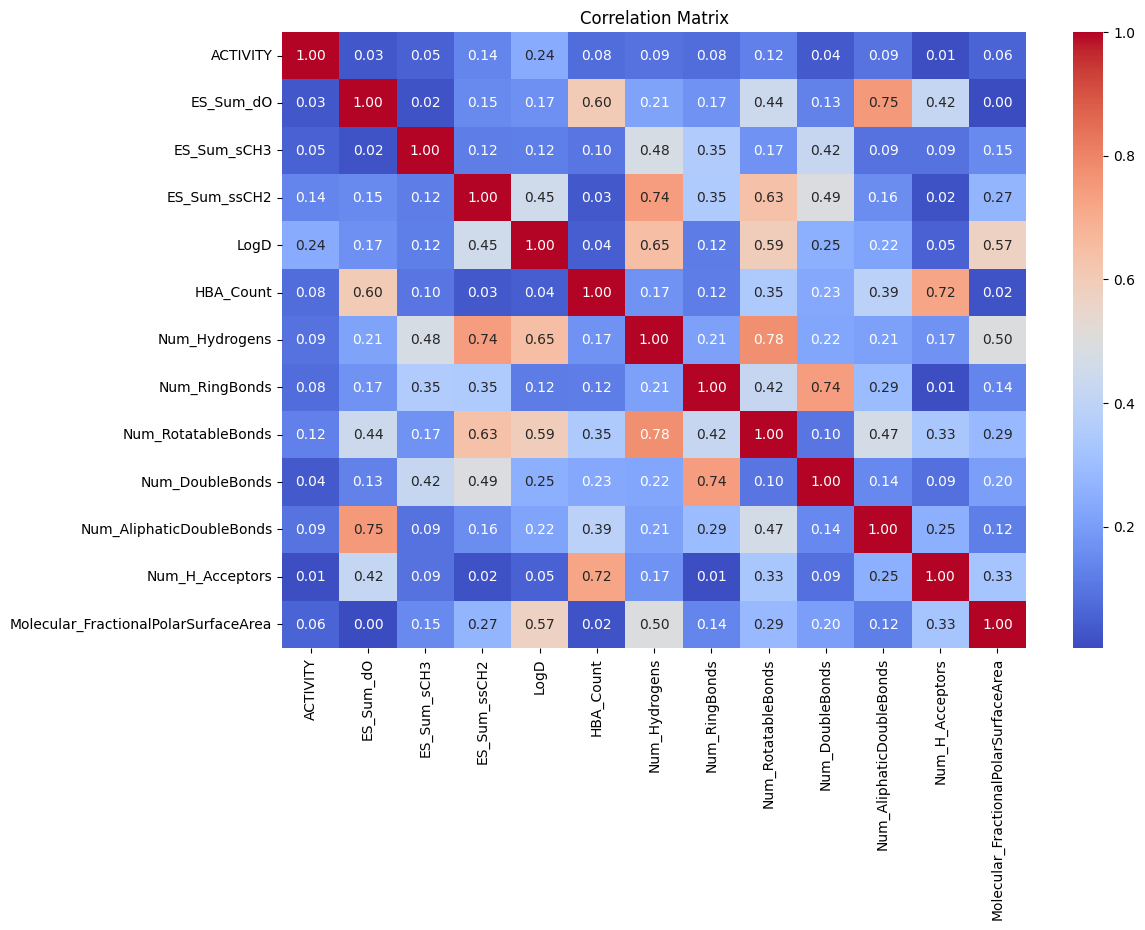

In [206]:
df.shape
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation Matrix")
plt.show()

In [207]:
# נסיר עמודות בעלי מתאם של מעל 0.8
corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

df.drop(columns=to_drop, inplace=True)


In [208]:
print(df.columns)


Index(['ACTIVITY', 'ES_Sum_dO', 'ES_Sum_dssC', 'ES_Sum_sCH3', 'ES_Sum_ssCH2',
       'CoordDimension', 'LogD', 'Molecular_Solubility', 'HBA_Count',
       'NPlusO_Count', 'Num_Hydrogens', 'Num_RingBonds', 'Num_RotatableBonds',
       'Num_Fragments', 'Num_ComplexedFragments', 'Num_DoubleBonds',
       'Num_AliphaticDoubleBonds', 'Num_H_Acceptors',
       'Molecular_FractionalPolarSurfaceArea'],
      dtype='object')


In [209]:
print(df.head())

   ACTIVITY  ES_Sum_dO  ES_Sum_dssC  ES_Sum_sCH3  ES_Sum_ssCH2  \
1         0      8.805        0.000        1.444         0.000   
2         0      0.000        0.000        4.116         4.727   
4         0      0.000        0.000        6.017         3.537   
5         0      0.000        0.000        4.039         3.466   
8         0      9.893       -0.186        2.798         0.000   

   CoordDimension   LogD  Molecular_Solubility  HBA_Count  NPlusO_Count  \
1               2 -0.183                 0.168          1             1   
2               2  3.313                -4.081          2             2   
4               2  2.225                -2.739          2             2   
5               2  2.857                -3.585          2             2   
8               2 -0.292                -0.281          1             2   

   Num_Hydrogens  Num_RingBonds  Num_RotatableBonds  Num_Fragments  \
1              4              0                   0              1   
2           

In [210]:
df


,ACTIVITY,ES_Sum_dO,ES_Sum_dssC,ES_Sum_sCH3,ES_Sum_ssCH2,CoordDimension,LogD,Molecular_Solubility,HBA_Count,NPlusO_Count,Num_Hydrogens,Num_RingBonds,Num_RotatableBonds,Num_Fragments,Num_ComplexedFragments,Num_DoubleBonds,Num_AliphaticDoubleBonds,Num_H_Acceptors,Molecular_FractionalPolarSurfaceArea
1,0,8.805,0.000,1.444,0.000,2,-0.183,0.168,1,1,4,0,0,1,1,1,1,1,0.286
2,0,0.000,0.000,4.116,4.727,2,3.313,-4.081,2,2,22,6,8,1,1,3,0,2,0.075
4,0,0.000,0.000,6.017,3.537,2,2.225,-2.739,2,2,20,0,7,1,1,1,1,2,0.089
5,0,0.000,0.000,4.039,3.466,2,2.857,-3.585,2,2,20,6,7,1,1,3,0,2,0.080
8,0,9.893,-0.186,2.798,0.000,2,-0.292,-0.281,1,2,8,0,1,1,1,1,1,2,0.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,1,10.605,-0.245,3.273,0.000,2,1.982,-2.493,2,2,12,6,3,1,1,4,1,2,0.150
1996,1,10.946,-0.335,1.947,1.293,2,2.420,-2.737,3,3,12,5,5,1,1,4,2,2,0.208
1997,1,10.746,0.000,4.123,0.000,2,2.687,-3.047,1,1,14,6,3,1,1,4,1,1,0.096
2004,1,11.285,0.311,0.000,2.828,2,2.351,-2.477,1,1,10,11,0,1,1,4,1,1,0.119


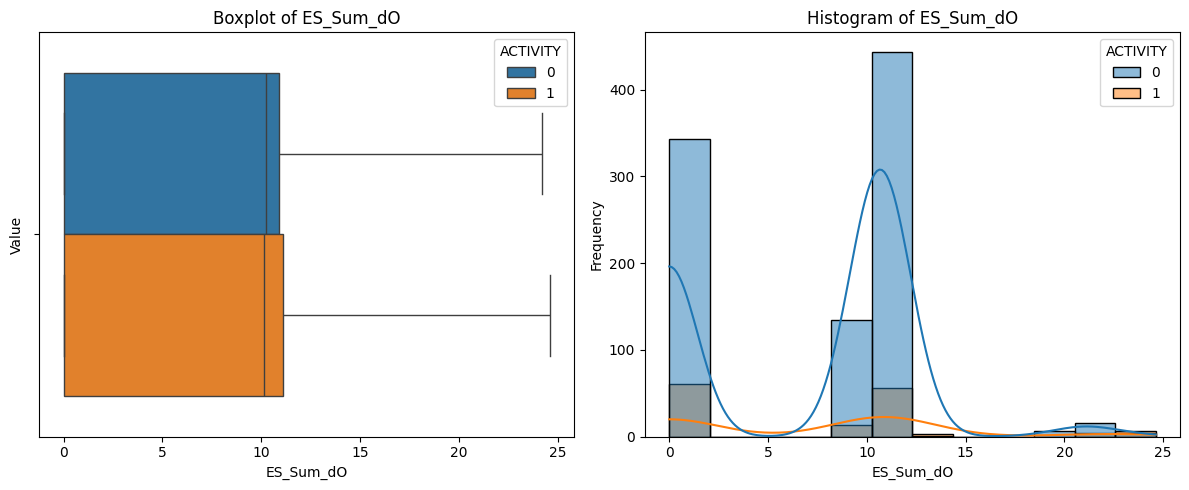

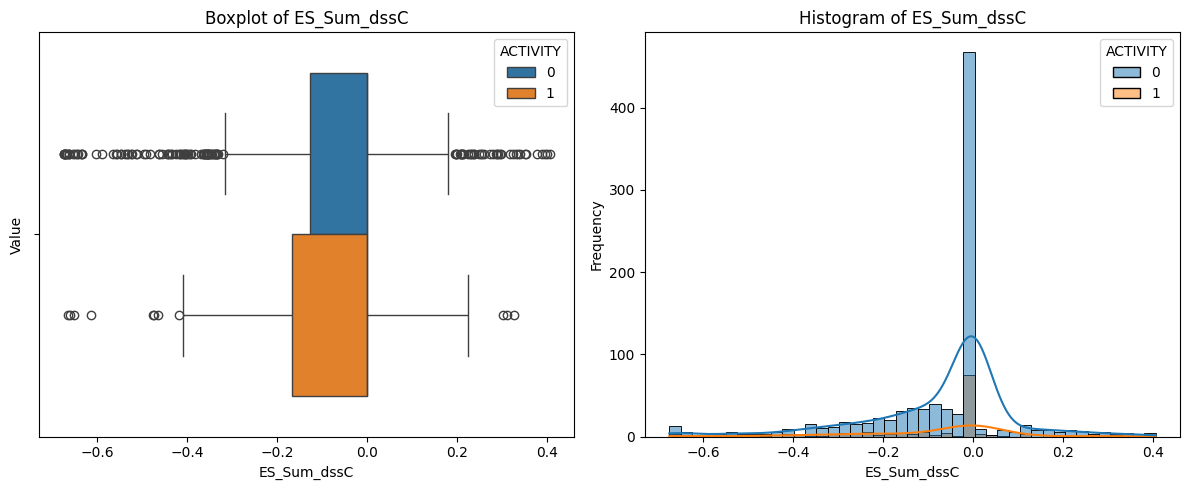

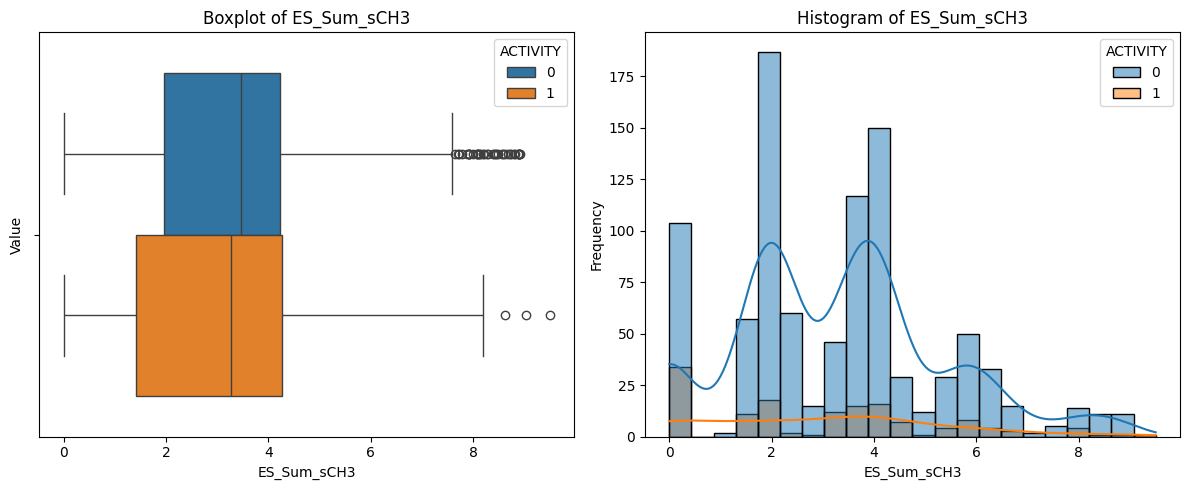

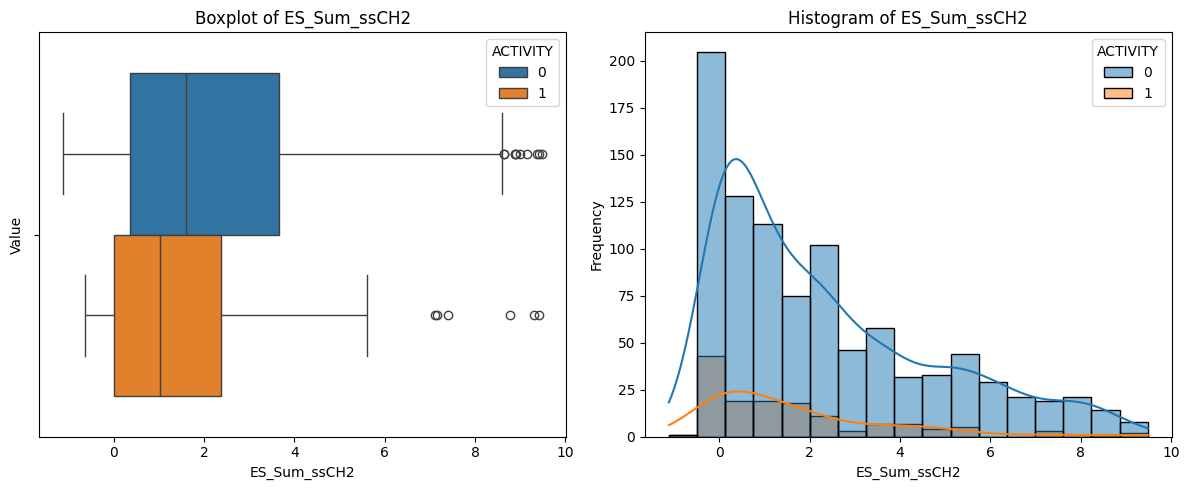

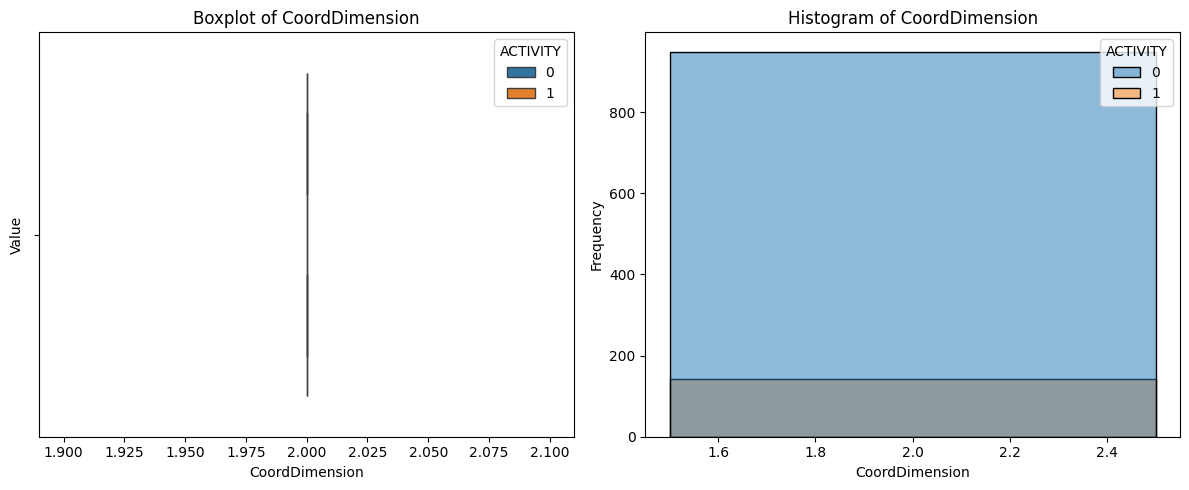

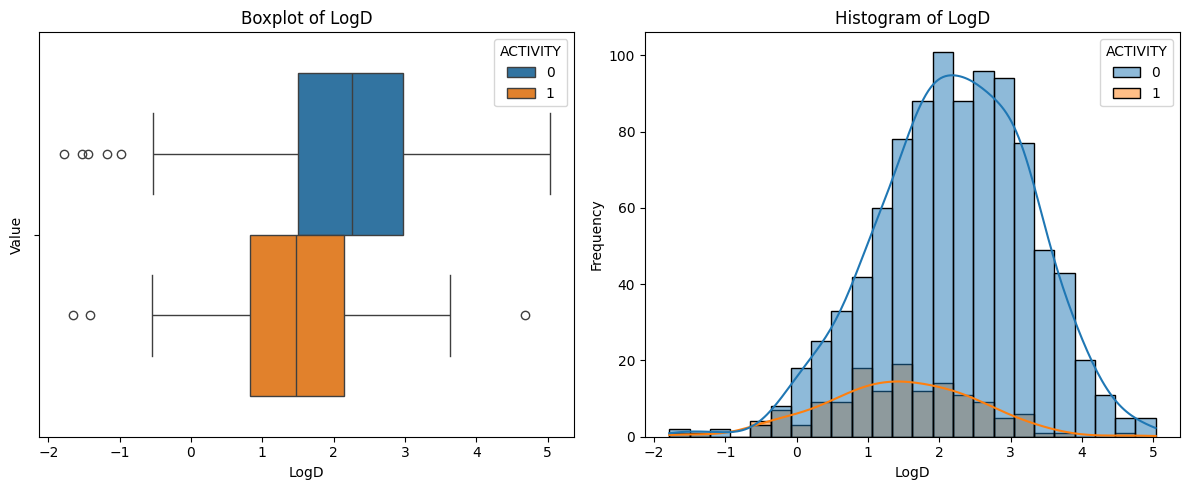

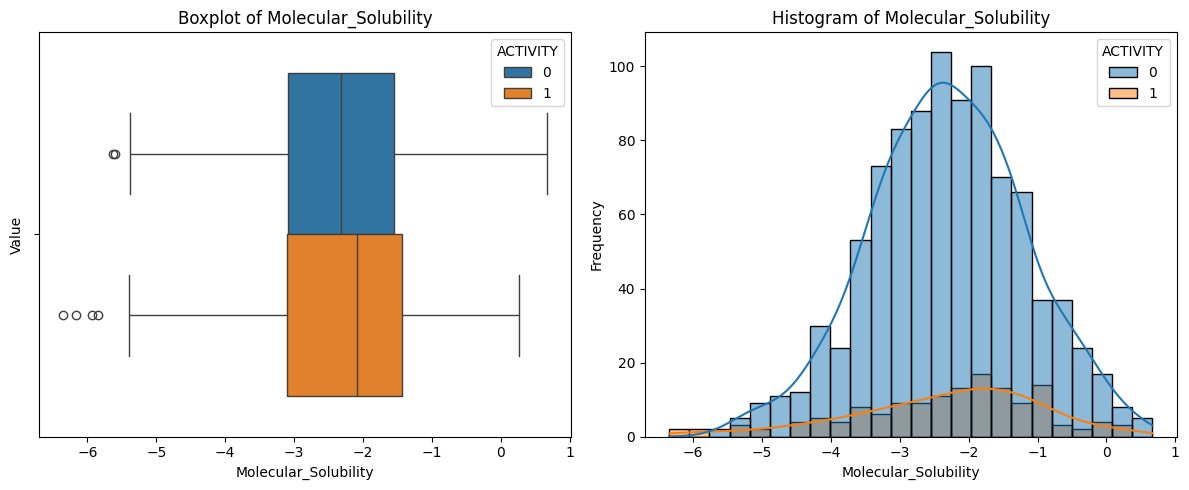

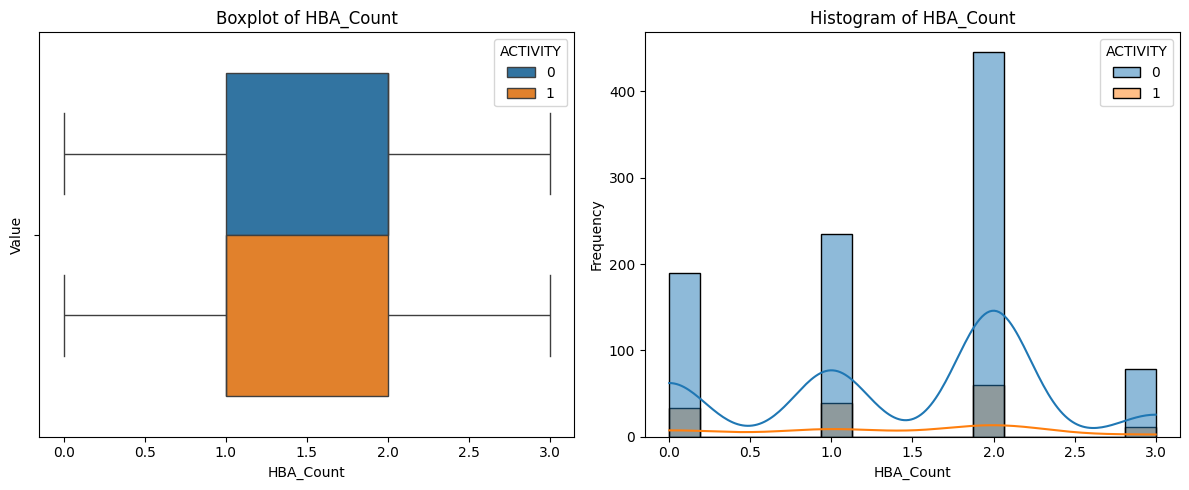

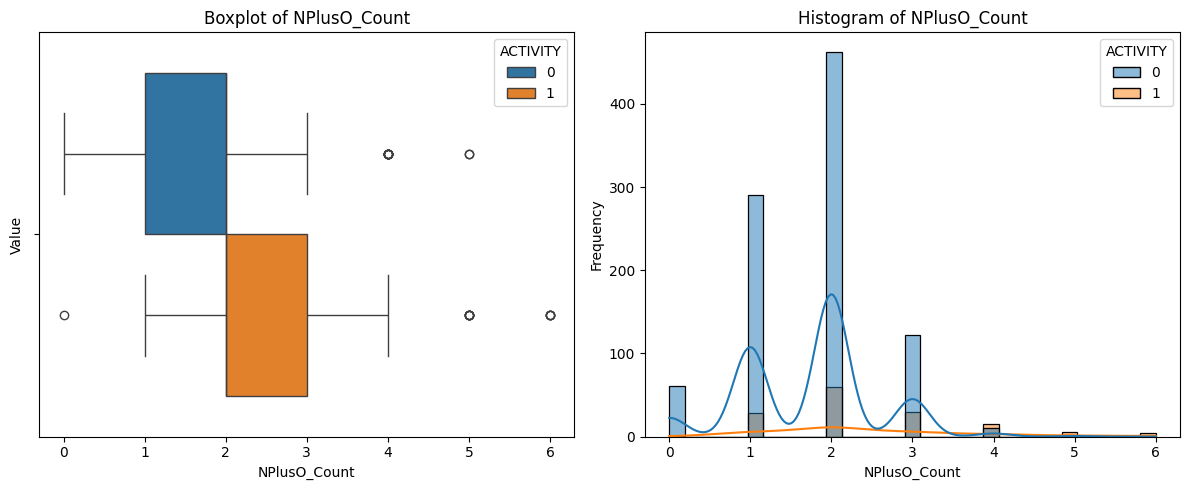

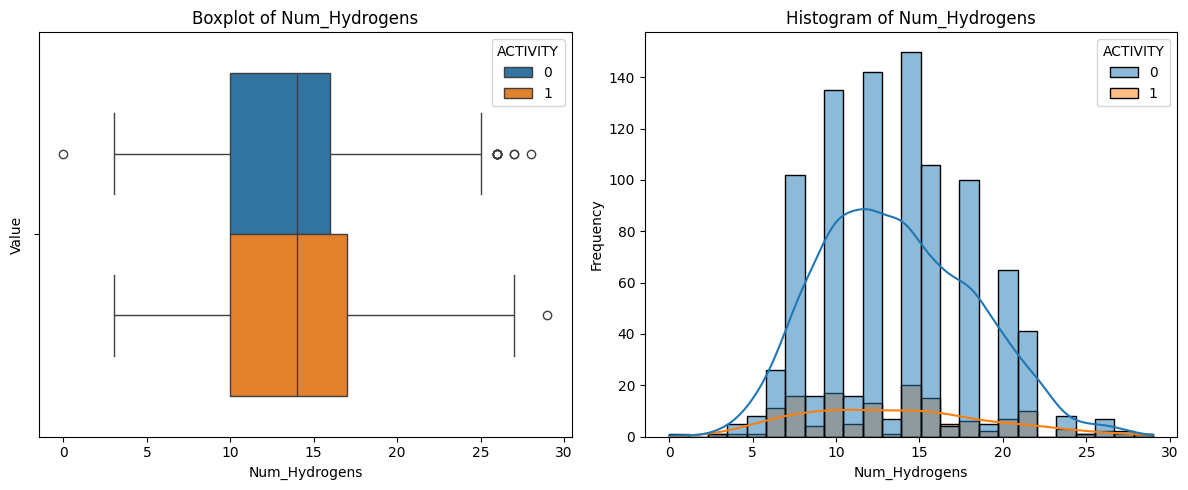

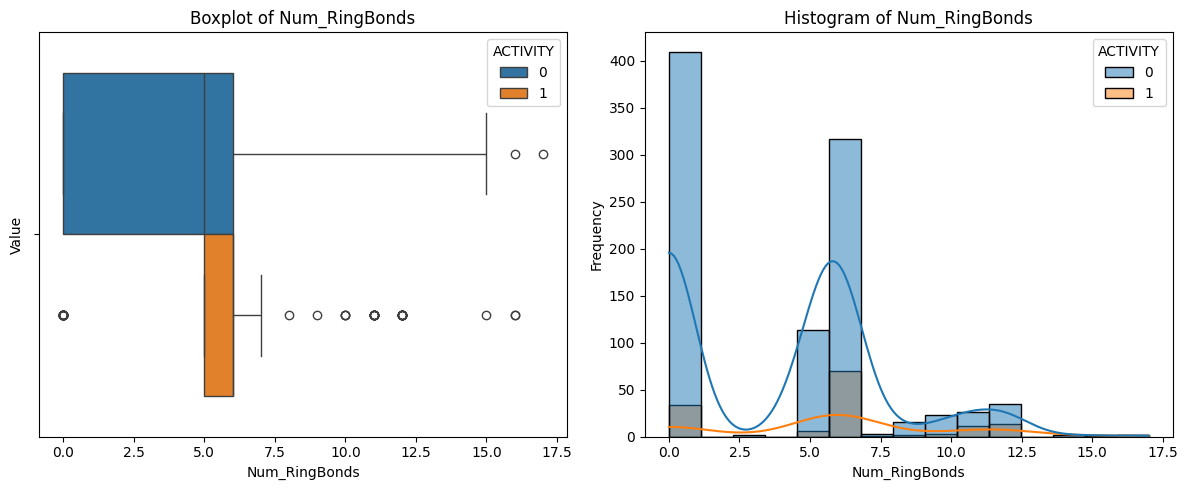

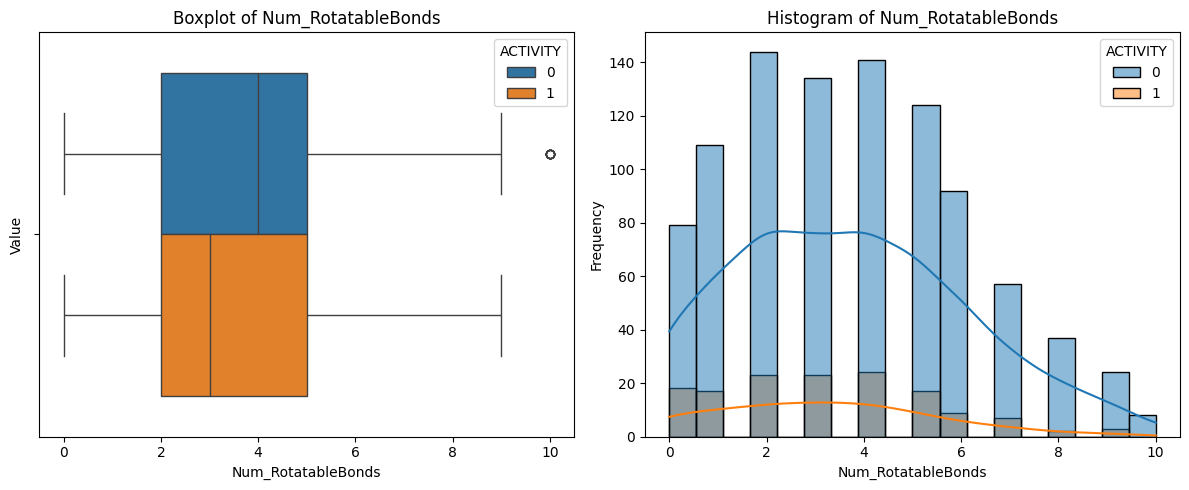

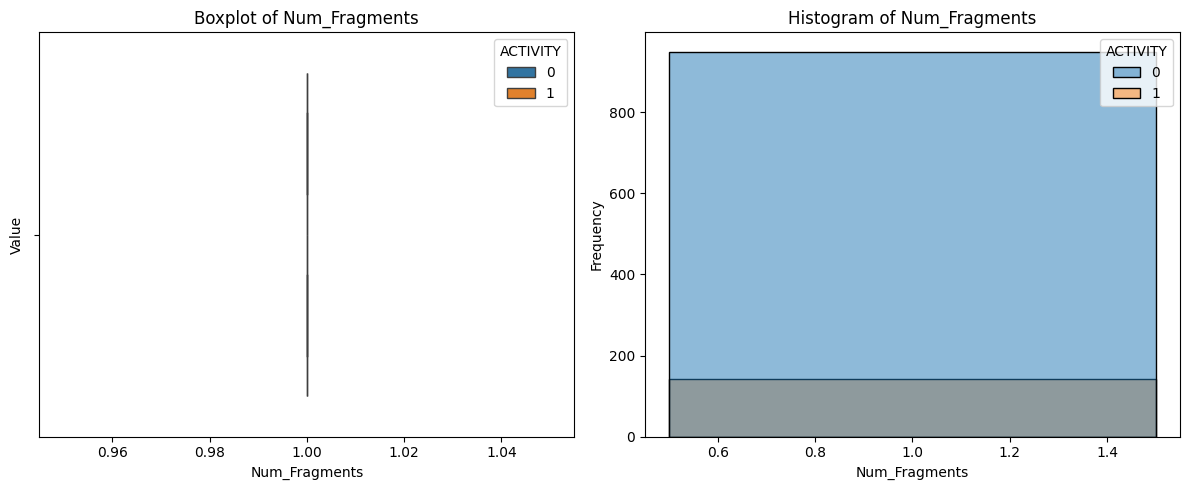

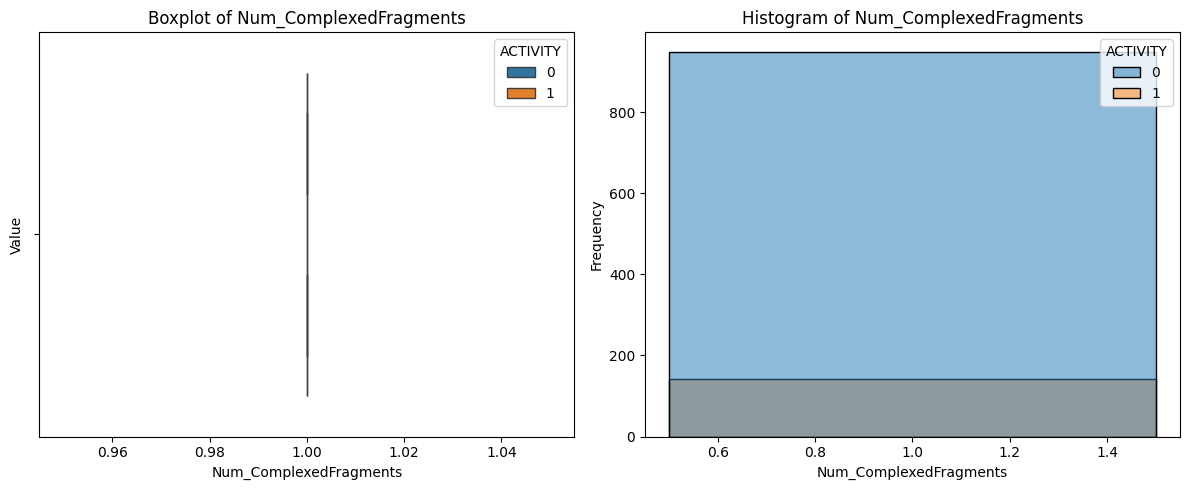

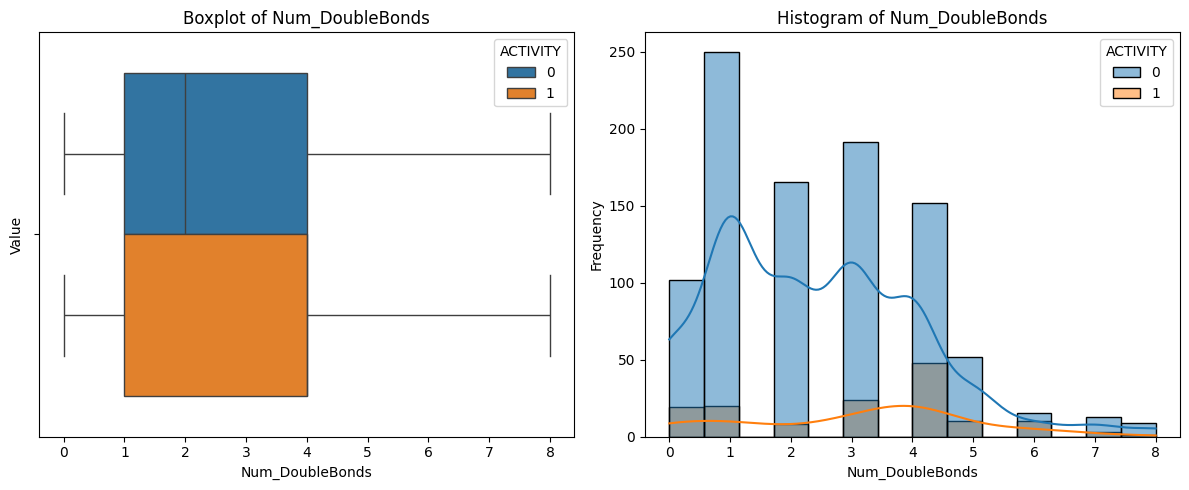

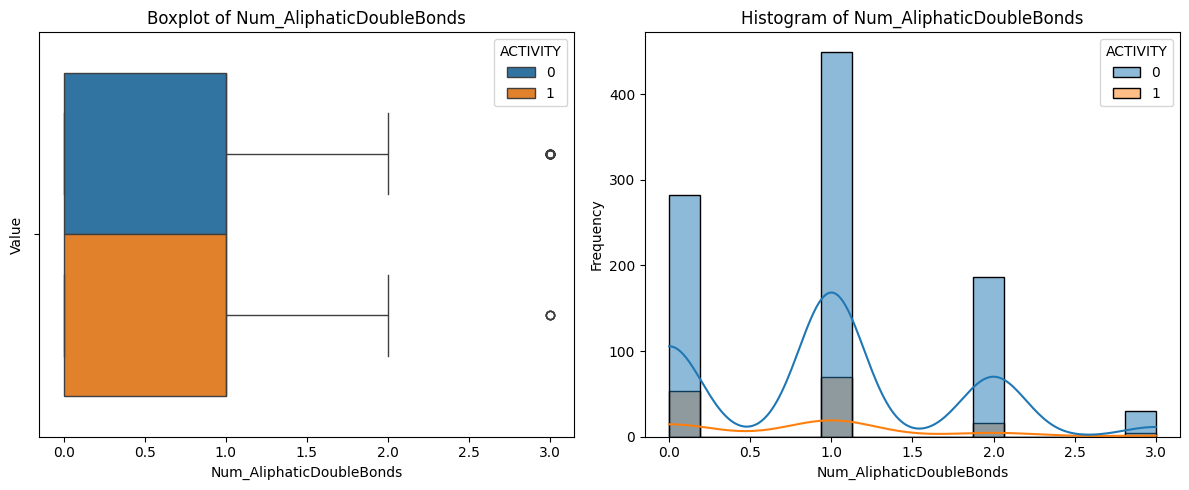

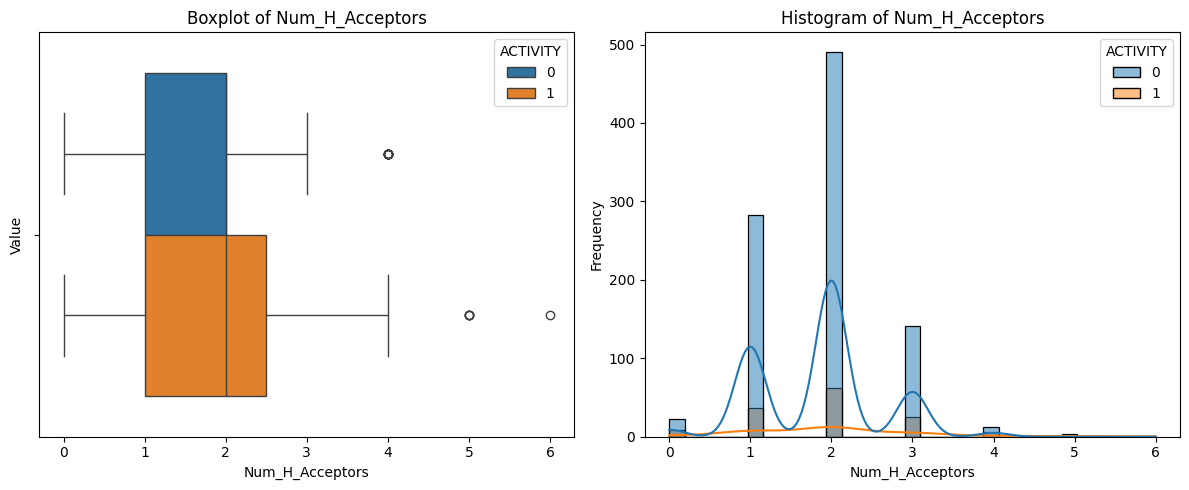

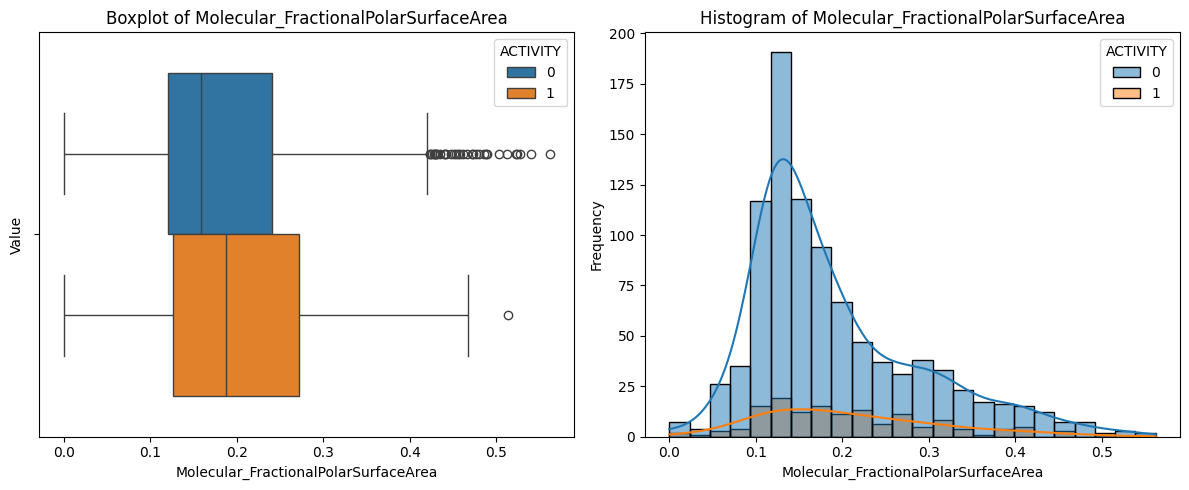

In [211]:
def plot_distributions(df, target_column):
    """
    Generates boxplots and histograms for all columns in the dataset except the target column.
    Handles cases where KDE fails due to low variance or collinearity.
    """
    columns_to_plot = [col for col in df.columns if col != target_column]

    for col in columns_to_plot:
        # Create a figure with two subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Boxplot
        sns.boxplot(data=df, x=col, ax=axes[0], hue=target_column)
        axes[0].set_title(f'Boxplot of {col}')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Value')

        # Histogram with KDE
        try:
            sns.histplot(data=df, x=col, kde=True, hue=target_column, ax=axes[1])
        except Exception as e:
            print(f"Warning: KDE failed for column {col}. Error: {e}")
            sns.histplot(data=df, x=col, kde=False, hue=target_column, ax=axes[1])  # Skip KDE if it fails
        axes[1].set_title(f'Histogram of {col}')
        axes[1].set_xlabel(col)
        axes[1].set_ylabel('Frequency')

        # Adjust layout and show
        plt.tight_layout()
        plt.show()

# Example usage
# Assuming `df_cleaned` is your cleaned dataset and 'ACTIVITY' is your target column
plot_distributions(df, target_column='ACTIVITY')

In [212]:
def descriptive_statistics(df):
    stats = []

    for col in df.columns:
        if df[col].dtype in [np.int64, np.float64] and df[col].nunique() > 2:
            variable_range = f"{df[col].min()}-{df[col].max()}"
            mean = df[col].mean()
            std_dev = df[col].std()
            stats.append([col, variable_range, mean, std_dev])

        elif df[col].dtype in [np.int64, np.float64] and df[col].nunique() == 2:

            df_binary = df[col].apply(lambda x: 0 if abs(x - 0) < 1e-5 else (1 if abs(x - 1) < 1e-5 else np.nan))
            freq_0 = (df_binary == 0).sum()
            freq_1 = (df_binary == 1).sum()
            total = len(df_binary)
            perc_0 = (freq_0 / total) * 100
            perc_1 = (freq_1 / total) * 100
            stats.append([col, "0-1",
                          f"0: {freq_0} ({perc_0:.1f}%)",
                          f"1: {freq_1} ({perc_1:.1f}%)"])

    return pd.DataFrame(stats, columns=['Variable', 'Range', 'Mean', 'SD'])

stat_table = descriptive_statistics(df)

print(stat_table)

                                Variable         Range            Mean  \
0                               ACTIVITY           0-1  0: 949 (86.9%)   
1                              ES_Sum_dO    0.0-24.617        7.092919   
2                            ES_Sum_dssC  -0.675-0.406       -0.072771   
3                            ES_Sum_sCH3     0.0-9.504        3.259278   
4                           ES_Sum_ssCH2  -1.119-9.485        2.255512   
5                                   LogD  -1.785-5.031        2.098936   
6                   Molecular_Solubility  -6.348-0.668       -2.319945   
7                              HBA_Count           0-3        1.422161   
8                           NPlusO_Count           0-6        1.815018   
9                          Num_Hydrogens          0-29       13.626374   
10                         Num_RingBonds          0-17        4.082418   
11                    Num_RotatableBonds          0-10        3.649267   
12                       Num_DoubleBon

In [213]:
df

,ACTIVITY,ES_Sum_dO,ES_Sum_dssC,ES_Sum_sCH3,ES_Sum_ssCH2,CoordDimension,LogD,Molecular_Solubility,HBA_Count,NPlusO_Count,Num_Hydrogens,Num_RingBonds,Num_RotatableBonds,Num_Fragments,Num_ComplexedFragments,Num_DoubleBonds,Num_AliphaticDoubleBonds,Num_H_Acceptors,Molecular_FractionalPolarSurfaceArea
1,0,8.805,0.000,1.444,0.000,2,-0.183,0.168,1,1,4,0,0,1,1,1,1,1,0.286
2,0,0.000,0.000,4.116,4.727,2,3.313,-4.081,2,2,22,6,8,1,1,3,0,2,0.075
4,0,0.000,0.000,6.017,3.537,2,2.225,-2.739,2,2,20,0,7,1,1,1,1,2,0.089
5,0,0.000,0.000,4.039,3.466,2,2.857,-3.585,2,2,20,6,7,1,1,3,0,2,0.080
8,0,9.893,-0.186,2.798,0.000,2,-0.292,-0.281,1,2,8,0,1,1,1,1,1,2,0.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,1,10.605,-0.245,3.273,0.000,2,1.982,-2.493,2,2,12,6,3,1,1,4,1,2,0.150
1996,1,10.946,-0.335,1.947,1.293,2,2.420,-2.737,3,3,12,5,5,1,1,4,2,2,0.208
1997,1,10.746,0.000,4.123,0.000,2,2.687,-3.047,1,1,14,6,3,1,1,4,1,1,0.096
2004,1,11.285,0.311,0.000,2.828,2,2.351,-2.477,1,1,10,11,0,1,1,4,1,1,0.119


In [214]:
from google.colab import files
df.to_csv('df.csv', index=False)
files.download('Bitter_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [215]:
def normalize_data(df, target_column):
    # Select the columns to normalize (exclude the target column)
    columns_to_normalize = [col for col in df.columns if col != target_column]

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Apply normalization to the selected columns
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

    return df

# Example usage:
# Assuming `df` is your cleaned DataFrame and 'ACTIVITY' is your target column
df_normalized = normalize_data(df, target_column='ACTIVITY')

# Show the normalized data
print(df_normalized.head())

   ACTIVITY  ES_Sum_dO  ES_Sum_dssC  ES_Sum_sCH3  ES_Sum_ssCH2  \
1         0   0.357680     0.624422     0.151936      0.105526   
2         0   0.000000     0.624422     0.433081      0.551301   
4         0   0.000000     0.624422     0.633102      0.439080   
5         0   0.000000     0.624422     0.424979      0.432384   
8         0   0.401877     0.452359     0.294402      0.105526   

   CoordDimension      LogD  Molecular_Solubility  HBA_Count  NPlusO_Count  \
1             0.0  0.235035              0.928734   0.333333      0.166667   
2             0.0  0.747946              0.323119   0.666667      0.333333   
4             0.0  0.588322              0.514396   0.666667      0.333333   
5             0.0  0.681045              0.393814   0.666667      0.333333   
8             0.0  0.219043              0.864738   0.333333      0.333333   

   Num_Hydrogens  Num_RingBonds  Num_RotatableBonds  Num_Fragments  \
1       0.137931       0.000000                 0.0            0

In [216]:
df.to_csv('df_normalized.csv', index=False)
files.download('df_normalized.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>